In [16]:
import pandas as pd
data = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2018 - LDE.csv")
df = pd.DataFrame(data, columns=['TACKLES', 'TFL', 'SACKS', 'FF', 'TD', 'INT', 'PASS DEFLECTION', 'CATCH ALLOWED',
                                    'AGE',
                                    'SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
                                    'AGILITY', 'CATCH', 'JUMP', 'BREAK TACKLE', 'TACKLE', 'TOUGHNESS', 'PLAYER EGO', 'WGT', 'HGTIN'])
df = df.dropna(subset=['TACKLES'])
df['TFL'] = df['TFL'].astype(float)
df['SACKS'] = df['SACKS'].astype(float)
df['PASS DEFLECTION'] = df['PASS DEFLECTION'].astype(float)
df['HGTIN'] = df['HGTIN'].astype(float)
df = df[~(df['TACKLES'] <= 30)]
df = df.rename(columns={"PASS DEFLECTION": "DEFL", "CATCH ALLOWED": "CA"})
correlation_matrix = df.corr()

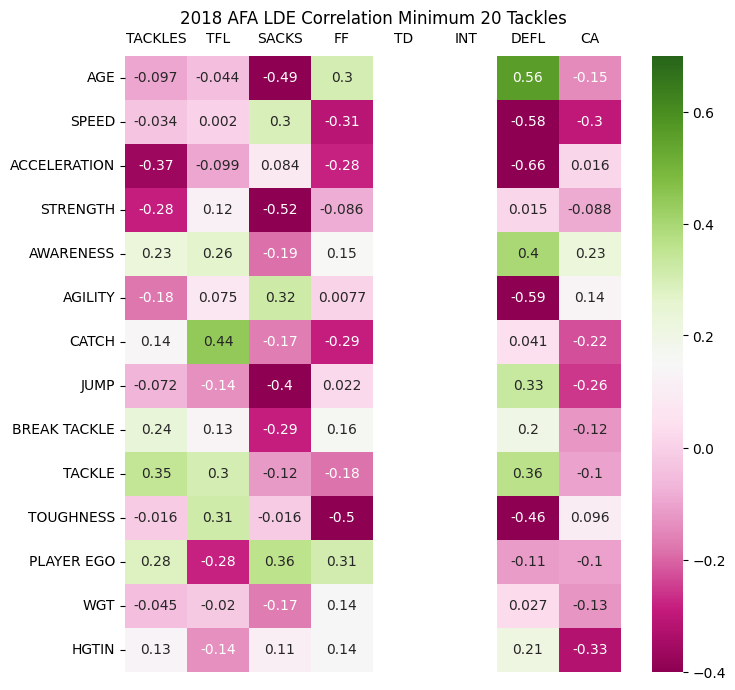

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
rows = ['AGE','SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
        'AGILITY', 'CATCH', 'JUMP', 'BREAK TACKLE', 'TACKLE', 'TOUGHNESS', 'PLAYER EGO', 'WGT', 'HGTIN']
cols = ['TACKLES', 'TFL', 'SACKS', 'FF', 'TD', 'INT', 'DEFL', 'CA']
sns.heatmap(correlation_matrix.loc[rows,cols], annot=True, cmap='PiYG', vmin=-.4,vmax=.7)
plt.title("2018 AFA LDE Correlation Minimum 20 Tackles")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom = False, top = False, labeltop = True)
plt.show()